In [14]:
import os
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\USER'

In [3]:
DF = pd.read_csv('fever.csv')

In [4]:
DF.head(5)

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [8]:
DF.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
DF.A = pd.Categorical(DF.A)

In [6]:
DF.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [7]:
DF.B = pd.Categorical(DF.B)

In [8]:
DF.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [9]:
DF.Volunteer = pd.Categorical(DF.Volunteer)

In [10]:
DF.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [11]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     category
 3   Relief     36 non-null     float64 
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


In [31]:
DF.describe(include = 'all')

,A,B,Volunteer,Relief
count,36.0,36.0,36.0,36.000000
unique,3.0,3.0,4.0,NaN
top,3.0,3.0,4.0,NaN
freq,12.0,12.0,9.0,NaN
mean,NaN,NaN,NaN,7.183333
std,NaN,NaN,NaN,3.272090
min,NaN,NaN,NaN,2.300000
25%,NaN,NaN,NaN,4.675000
50%,NaN,NaN,NaN,6.000000
75%,NaN,NaN,NaN,9.325000


In [23]:
formula = 'Relief ~ C(A)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [25]:
formula = 'Relief ~ C(A) + C(Volunteer)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                df      sum_sq     mean_sq          F    PR(>F)
C(A)           2.0  220.020000  110.010000  21.342133  0.000002
C(Volunteer)   3.0    0.072222    0.024074   0.004670  0.999550
Residual      30.0  154.637778    5.154593        NaN       NaN


In [12]:
formula = 'Relief ~ C(B)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [28]:
formula = 'Relief ~ C(B) + C(Volunteer)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                df      sum_sq    mean_sq         F    PR(>F)
C(B)           2.0  123.660000  61.830000  7.390105  0.002458
C(Volunteer)   3.0    0.072222   0.024074  0.002877  0.999782
Residual      30.0  250.997778   8.366593       NaN       NaN


In [24]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [27]:
formula = 'Relief ~ C(A) + C(B)+C(Volunteer)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                df      sum_sq     mean_sq          F        PR(>F)
C(A)           2.0  220.020000  110.010000  99.435151  1.902503e-13
C(B)           2.0  123.660000   61.830000  55.886514  1.676043e-10
C(Volunteer)   3.0    0.072222    0.024074   0.021760  9.955438e-01
Residual      28.0   30.977778    1.106349        NaN           NaN


In [36]:
formula = 'Relief ~ C(A) + C(B)+ C(Volunteer)+C(A):C(B)+C(A):C(Volunteer)+C(B):C(Volunteer)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df      sum_sq     mean_sq            F        PR(>F)
C(A)                2.0  220.020000  110.010000  1280.978976  1.026783e-14
C(B)                2.0  123.660000   61.830000   719.961186  3.187330e-13
C(Volunteer)        3.0    0.072222    0.024074     0.280323  8.385898e-01
C(A):C(B)           4.0   29.425000    7.356250    85.657682  1.020340e-08
C(A):C(Volunteer)   6.0    0.191111    0.031852     0.370889  8.837392e-01
C(B):C(Volunteer)   6.0    0.331111    0.055185     0.642588  6.954884e-01
Residual           12.0    1.030556    0.085880          NaN           NaN


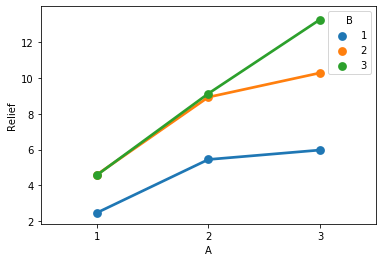

In [37]:
sns.pointplot(x = 'A' , y = 'Relief', hue = 'B', data = DF ,ci = None)

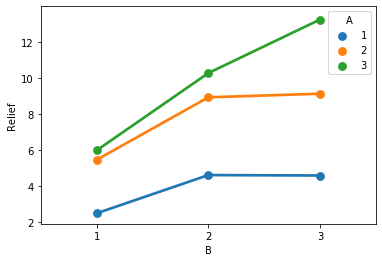

In [33]:
sns.pointplot(x = 'B' , y = 'Relief', hue = 'A', data = DF ,ci = None)

In [29]:
formula = 'Relief ~ C(A) + C(B)+C(A):C(Volunteer)'
model = ols(formula , DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df      sum_sq     mean_sq          F        PR(>F)
C(A)                2.0  220.020000  110.010000  78.612603  9.533657e-11
C(B)                2.0  123.660000   61.830000  44.183413  1.974356e-08
C(A):C(Volunteer)   9.0    0.263333    0.029259   0.020909  9.999992e-01
Residual           22.0   30.786667    1.399394        NaN           NaN


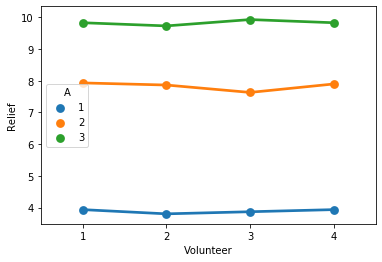

In [40]:
sns.pointplot(x = 'Volunteer' , y = 'Relief', hue = 'A', data = DF ,ci = None)

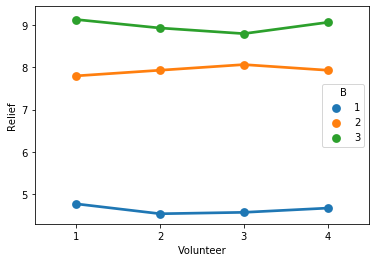

In [41]:
sns.pointplot(x = 'Volunteer' , y = 'Relief', hue = 'B', data = DF ,ci = None)